In [28]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft, fftfreq, fftshift

In [95]:
# `freq` * `nsample` has to be roughly larger than 100 kHz
# to exceed nyquist frequency of frequency range we're working with
# AFT1022 has max samping rate of 125 MHz
rep_rate = 100
nsample = 8000

In [96]:
fstart, fend = 20000, 21000

In [97]:
tt = np.linspace(0, 1 / rep_rate, nsample)
delta_t = tt[1] - tt[0]
ff_samp = fftfreq(nsample, delta_t)

In [98]:
ff = ff_samp[np.logical_and(ff_samp > fstart, ff_samp < fend)]

In [116]:
ff

array([20097.4875, 20197.475 , 20297.4625, 20397.45  , 20497.4375,
       20597.425 , 20697.4125, 20797.4   , 20897.3875, 20997.375 ])

In [117]:
# Now try to optimize phase configuration
n_iter = 1000
sums = np.zeros(n_iter)
phases = np.zeros((n_iter, ff.size))

for i in range(n_iter):
    np.random.seed(i)

    phase = np.random.rand(ff.size) * 2 * np.pi
    sig = get_signal(tt, ff, phase)
    
    sums[i] = np.sum(sig)
    phases[i] = phase
    
best_phase = phases[np.argmin(sums)]

In [103]:
def get_signal(tt, ff, phase=None):
    sig = np.zeros_like(tt)
    if phase is None:
        phase = np.zeros_like(ff)

    for i, f in enumerate(ff):
            sig += np.sin(2 * np.pi * f * tt + phase[i])
            
    return sig

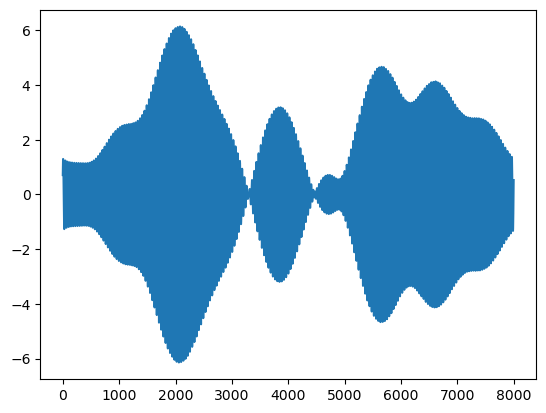

In [118]:
sig = get_signal(tt, ff, best_phase)
plt.plot(sig)

(20000.0, 21000.0)

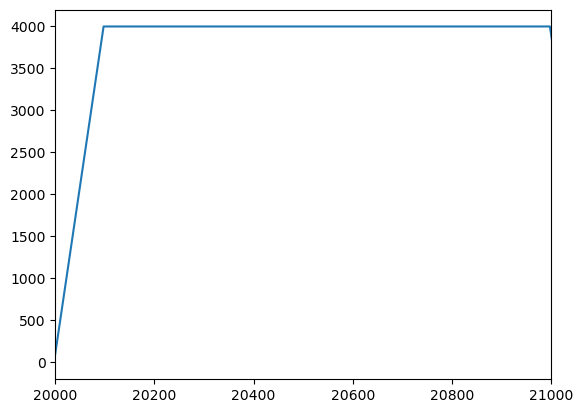

In [115]:
sp = fftshift(fft(sig))
freq = fftshift(fftfreq(tt.size, delta_t))

plt.plot(freq, np.abs(sp))
plt.xlim(fstart, fend)